In [2]:
import pandas as pd
import ccxt

In [2]:
print("Hello world")

Hello world


In [1]:
print("Hello from Colab!")

Hello from Colab!


## Data obtained from CoinDesk 
------------------------------
### freq: daily 
### informations: Closing Price(USD), 24h Open(USD), 24h High(USD), 24h Low(USD)

In [20]:
btc = pd.read_csv("../data/0_raw/BTC_USD_2013-10-01_2021-04-21-CoinDesk.csv")

In [21]:
btc

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2754,BTC,2021-04-17,61965.782598,63225.093917,63520.325374,60033.534667
2755,BTC,2021-04-18,60574.444728,61444.232503,62534.028498,59802.889267
2756,BTC,2021-04-19,56850.830166,60191.525406,60531.988848,52148.983544
2757,BTC,2021-04-20,56224.101588,56335.389141,57609.368118,54449.245330


In [33]:
eth = pd.read_csv("../data/0_raw/ETH_USD_2015-08-09_2021-04-21-CoinDesk.csv")

In [34]:
eth

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
1,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
3,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
4,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151
...,...,...,...,...,...,...
2077,ETH,2021-04-17,2438.429594,2516.393168,2541.548966,2328.830718
2078,ETH,2021-04-18,2374.755810,2426.476182,2495.921609,2320.285017
2079,ETH,2021-04-19,2249.008696,2323.384415,2344.369598,1978.224247
2080,ETH,2021-04-20,2201.648351,2242.321493,2278.921376,2086.202945


## Data obtaining from ccxt library 
--------------------------------------------
motivation, get high frequency data from exchange
exchange(s) should be decided \
Another thing is that cryptocurrency against which currency should be decided. \
anlamadığım bir durum var doları cryptocurrency -lere karşı bulamıyorum

In [3]:
exch = 'binance' # initial exchange
t_frame = '4h' # 1-day timeframe, usually from 1-minute to 1-week depending on the exchange
symbol = 'EH/BTC' # initial symbol
#exchange_list = ['binance','bitfinex','bytetrade','ftx','kraken','poloniex','upbit','acx','bequant','bigone','bitforex','bitkk','bitz','btcalpha','coinex','crex24','digifinex','gateio','hitbtc2','huobipro','huobiru','kucoin','lbank','okex','okex3','stex','upbit','whitebit','zb']
exchange_list = ['binance']
# Get our Exchange
try:
    exchange = getattr (ccxt, exch) ()
except AttributeError:
    print('-'*36,' ERROR ','-'*35)
    print('Exchange "{}" not found. Please check the exchange is supported.'.format(exch))
    print('-'*80)
    quit()
 
# Check if fetching of OHLC Data is supported
if exchange.has["fetchOHLCV"] != True:
    print('-'*36,' ERROR ','-'*35)
    print('{} does not support fetching OHLC data. Please use another  exchange'.format(exch))
    print('-'*80)
    quit()
 
# Check requested timeframe is available. If not return a helpful error.
if (not hasattr(exchange, 'timeframes')) or (t_frame not in exchange.timeframes):
    print('-'*36,' ERROR ','-'*35)
    print('The requested timeframe ({}) is not available from {}\n'.format(t_frame,exch))
    print('Available timeframes are:')
    for key in exchange.timeframes.keys():
        print('  - ' + key)
    print('-'*80)
    quit()
 
# Check if the symbol is available on the Exchange
exchange.load_markets()
if symbol not in exchange.symbols:
    print('-'*36,' ERROR ','-'*35)
    print('The requested symbol ({}) is not available from {}\n'.format(symbol,exch))
    print('Available symbols are:')
    for key in exchange.symbols:
        print('  - ' + key)
    print('-'*80)
    quit()

------------------------------------  ERROR  -----------------------------------
The requested symbol (EH/BTC) is not available from binance

Available symbols are:
  - 1INCH/BTC
  - 1INCH/BUSD
  - 1INCH/USDT
  - 1INCHDOWN/USDT
  - 1INCHUP/USDT
  - AAVE/BKRW
  - AAVE/BNB
  - AAVE/BTC
  - AAVE/BUSD
  - AAVE/ETH
  - AAVE/USDT
  - AAVEDOWN/USDT
  - AAVEUP/USDT
  - ACM/BTC
  - ACM/BUSD
  - ACM/USDT
  - ADA/AUD
  - ADA/BKRW
  - ADA/BNB
  - ADA/BRL
  - ADA/BTC
  - ADA/BUSD
  - ADA/ETH
  - ADA/EUR
  - ADA/GBP
  - ADA/PAX
  - ADA/RUB
  - ADA/TRY
  - ADA/TUSD
  - ADA/USDC
  - ADA/USDT
  - ADADOWN/USDT
  - ADAUP/USDT
  - ADX/BNB
  - ADX/BTC
  - ADX/ETH
  - AE/BNB
  - AE/BTC
  - AE/ETH
  - AERGO/BTC
  - AERGO/BUSD
  - AGI/BNB
  - AGI/BTC
  - AGI/ETH
  - AION/BNB
  - AION/BTC
  - AION/BUSD
  - AION/ETH
  - AION/USDT
  - AKRO/BTC
  - AKRO/USDT
  - ALGO/BNB
  - ALGO/BTC
  - ALGO/BUSD
  - ALGO/PAX
  - ALGO/TUSD
  - ALGO/USDC
  - ALGO/USDT
  - ALICE/BTC
  - ALICE/BUSD
  - ALICE/USDT
  - ALPHA/BNB
  - 

In [ ]:
data = exchange.fetch_ohlcv(symbol, t_frame)
header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.DataFrame(data, columns=header).set_index('Timestamp')
df['symbol'] = symbol
syms = [symbol]
filename = '{}.csv'.format(t_frame)

for exch in exchange_list:
    try:
        exchange = getattr (ccxt, exch) ()
    except AttributeError:
        print('-'*36,' ERROR ','-'*35)
        print('Exchange "{}" not found. Please check the exchange is supported.'.format(exch))
        print('-'*80)
        quit()
    if exchange.has["fetchOHLCV"] != True:
        print('-'*36,' ERROR ','-'*35)
        print('{} does not support fetching OHLC data. Please use another exchange'.format(exch))
        print('-'*80)
        quit()
    if (not hasattr(exchange, 'timeframes')) or (t_frame not in exchange.timeframes):
        print('-'*36,' ERROR ','-'*35)
        print('The requested timeframe ({}) is not available from {}\n'.format(t_frame,exch))
        print('Available timeframes are:')
        for key in exchange.timeframes.keys():
            print('  - ' + key)
        print('-'*80)
        quit()
    exchange.load_markets()
    for coin in exchange.symbols:
        if coin in syms or coin[-3:] != 'BTC':
            continue
        else:
            try:
                data = exchange.fetch_ohlcv(coin, t_frame)
            except:
                continue
            data_df = pd.DataFrame(data, columns=header).set_index('Timestamp')
            data_df['symbol'] = coin
            df = df.append(data_df)
            syms.append(coin)
df.index = df.index/1000 #Timestamp is 1000 times bigger than it should be in this case
df['Date'] = pd.to_datetime(df.index,unit='s')
df.to_csv(filename)

In [ ]:
data = pd.read_csv("./4h.csv")

In [17]:
data.Date.min()

'2018-04-30 12:00:00'

In [24]:
data = data.sort_values("Date")

<AxesSubplot:>

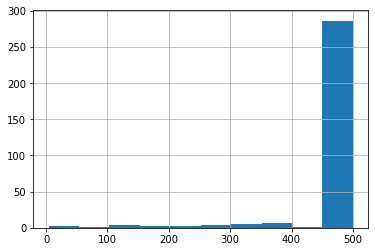

In [31]:
data.groupby("symbol").size().hist()

In [19]:
data.symbol.unique()

array(['ETH/BTC', '1INCH/BTC', 'AAVE/BTC', 'ACM/BTC', 'ADA/BTC',
       'ADX/BTC', 'AE/BTC', 'AERGO/BTC', 'AGI/BTC', 'AION/BTC',
       'AKRO/BTC', 'ALGO/BTC', 'ALICE/BTC', 'ALPHA/BTC', 'AMB/BTC',
       'ANKR/BTC', 'ANT/BTC', 'APPC/BTC', 'ARDR/BTC', 'ARK/BTC',
       'ARN/BTC', 'ARPA/BTC', 'ASR/BTC', 'AST/BTC', 'ATM/BTC', 'ATOM/BTC',
       'AUCTION/BTC', 'AUDIO/BTC', 'AUTO/BTC', 'AVA/BTC', 'AVAX/BTC',
       'AXS/BTC', 'BADGER/BTC', 'BAL/BTC', 'BAND/BTC', 'BAR/BTC',
       'BAT/BTC', 'BCC/BTC', 'BCD/BTC', 'BCH/BTC', 'BCN/BTC', 'BCPT/BTC',
       'BEAM/BTC', 'BEL/BTC', 'BLZ/BTC', 'BNB/BTC', 'BNT/BTC', 'BOT/BTC',
       'BQX/BTC', 'BRD/BTC', 'BSV/BTC', 'BTCB/BTC', 'BTCST/BTC',
       'BTG/BTC', 'BTS/BTC', 'BTT/BTC', 'BZRX/BTC', 'CAKE/BTC', 'CDT/BTC',
       'CELO/BTC', 'CELR/BTC', 'CFX/BTC', 'CHAT/BTC', 'CHR/BTC',
       'CHZ/BTC', 'CKB/BTC', 'CLOAK/BTC', 'CMT/BTC', 'CND/BTC',
       'COCOS/BTC', 'COMP/BTC', 'COS/BTC', 'COTI/BTC', 'CRV/BTC',
       'CTK/BTC', 'CTSI/BTC', 'CTXC/BTC', 'C